In [3]:
import pandas as pd 
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import style
from matplotlib import style
%matplotlib inline

In [4]:
#UPLOADING THE DATA SET 
df = pd.read_csv("Comcast_telecom_complaints_data.csv",index_col=0, parse_dates=[2,3])

In [5]:
df.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Ticket #,,,,,,,,,,
250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 250635 to 363614
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Customer Complaint           2224 non-null   object        
 1   Date                         2224 non-null   datetime64[ns]
 2   Date_month_year              2224 non-null   datetime64[ns]
 3   Time                         2224 non-null   object        
 4   Received Via                 2224 non-null   object        
 5   City                         2224 non-null   object        
 6   State                        2224 non-null   object        
 7   Zip code                     2224 non-null   int64         
 8   Status                       2224 non-null   object        
 9   Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 191.1+ KB


In [7]:
df.isna().sum()

Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [8]:
df.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Ticket #,,,,,,,,,,
250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [9]:
#trend chart for complaiont at monthly levels
df['month'] = pd.DatetimeIndex(df['Date_month_year']).month
m = df['Customer Complaint'].groupby(df['month']).count().reset_index()
m

,month,Customer Complaint
0,1,55
1,2,59
2,3,45
3,4,375
4,5,317
5,6,1046
6,7,49
7,8,67
8,9,55
9,10,53


In [10]:
df.columns

Index(['Customer Complaint', 'Date', 'Date_month_year', 'Time', 'Received Via',
       'City', 'State', 'Zip code', 'Status', 'Filing on Behalf of Someone',
       'month'],
      dtype='object')

In [11]:
df.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
Ticket #,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


Text(0.5, 1.0, 'Frequency of Complaints on Month')

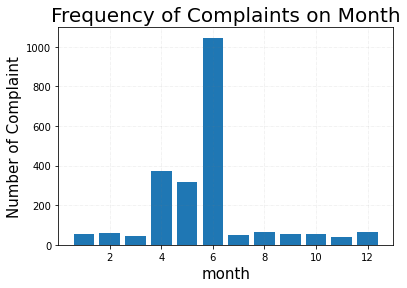

In [12]:
x=m['month']
y=m['Customer Complaint']
plt.bar(x,y)
plt.xlabel("month",fontsize=15)
plt.ylabel("Number of Complaint",fontsize=15)
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.title("Frequency of Complaints on Month",fontsize=20)

In [13]:
#trend chart for companies at daily levels
import datetime
from dateutil.parser import parse 
import pytz 

df['Date of the Month'] = df['Date_month_year'].apply(lambda d: d.day)
d = df['Customer Complaint'].groupby(df['Date of the Month']).count().reset_index()
d

,Date of the Month,Customer Complaint
0,4,206
1,5,131
2,6,272
3,13,68
4,14,54
5,15,58
6,16,65
7,17,60
8,18,69
9,19,50


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


Text(0.5, 1.0, ' Complaints on Date of any month  ')

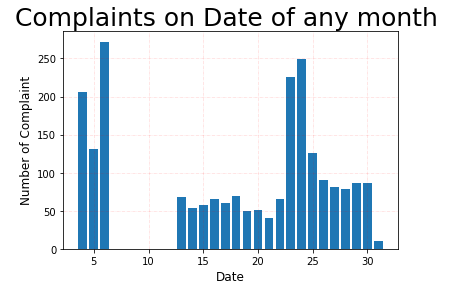

In [14]:
x=d['Date of the Month']
y=d['Customer Complaint']
plt.bar(x,y)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Number of Complaint",fontsize=12)
plt.grid(b = True, color ='red',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.title(" Complaints on Date of any month  ",fontsize=25)

In [15]:
#frequency of complaint types 


In [16]:
df['Customer Complaint'].unique()

array(['Comcast Cable Internet Speeds',
       'Payment disappear - service got disconnected',
       'Speed and Service', ..., 'complaint about comcast',
       'Extremely unsatisfied Comcast customer',
       'Comcast, Ypsilanti MI Internet Speed'], dtype=object)

In [17]:
df['Customer Complaint'].nunique()

1841

In [18]:
x=df['Customer Complaint'].value_counts()

In [19]:

d1=pd.DataFrame(x)
d1

,Customer Complaint
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Comcast Billing,11
...,...
Terrible Service,1
Comcast blocking HBOGO on Playstation 4 Consoles,1
Suspected Throttling,1
Internet connection both upload and download speeds,1


<AxesSubplot:xlabel='Complaint Type', ylabel='frequency'>

/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


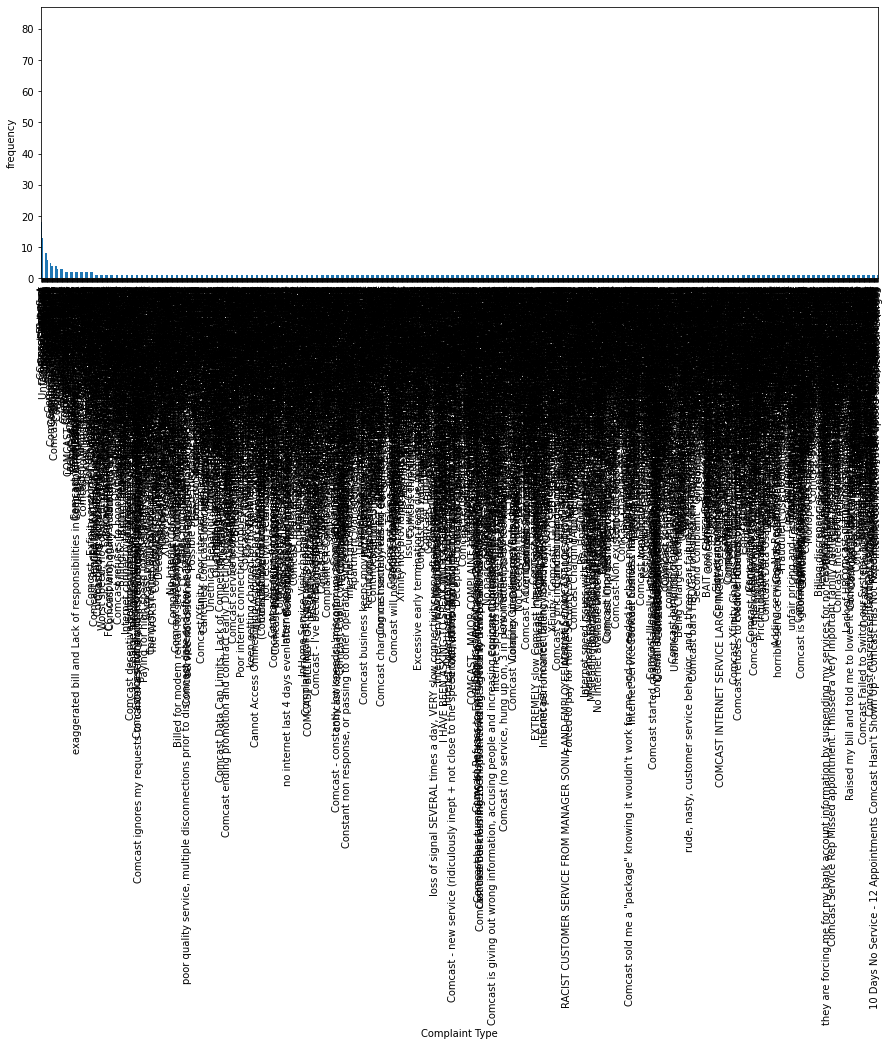

In [20]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
df['Customer Complaint'].value_counts().plot(ax=ax, kind='bar', xlabel='Complaint Type', ylabel='frequency')

In [22]:
df['Customer Complaint'].str.split('internet') #

Ticket #
250635                      [Comcast Cable Internet Speeds]
223441       [Payment disappear - service got disconnected]
242732                                  [Speed and Service]
277946    [Comcast Imposed a New Usage Cap of 300GB that...
307175         [Comcast not working and no service to boot]
                                ...                        
213550                               [Service Availability]
318775         [Comcast Monthly Billing for Returned Modem]
331188                            [complaint about comcast]
360489             [Extremely unsatisfied Comcast customer]
363614               [Comcast, Ypsilanti MI Internet Speed]
Name: Customer Complaint, Length: 2224, dtype: object

In [23]:
df["Complaint Category"] = np.where(df["Customer Complaint"].str.contains('Internet|Speed|Cable|connection|DSL|modem|ip|ISP',case=False,regex=True), 'Internet',
         np.where(df["Customer Complaint"].str.contains('Payment|Disappear|Disconnected',case=False,regex=True), 'Paym',
         np.where(df["Customer Complaint"].str.contains('Comcast|Imposed|New|Usage|Cap|of',case=False,regex=True), 'Usage',
         np.where(df["Customer Complaint"].str.contains('complaint|breach|bully|non response|False|invalid',case=False,regex=True), 'Greviances',
         np.where(df["Customer Complaint"].str.contains('email|mail',case=False,regex=True), 'Email',
         np.where(df["Customer Complaint"].str.contains('policies|competition|Forgery|Fraud|Deceptive|deception|scam|business',case=False,regex=True), 'Marketing',
         'Other'))))))

In [24]:
df["Complaint Category"]

Ticket #
250635    Internet
223441        Paym
242732    Internet
277946       Usage
307175       Usage
            ...   
213550       Other
318775    Internet
331188       Usage
360489       Usage
363614    Internet
Name: Complaint Category, Length: 2224, dtype: object

In [25]:
d3= pd.DataFrame(df["Customer Complaint"].groupby(df["Complaint Category"]).count().sort_values(ascending=True)).reset_index()
d3          #usage complaint types are maximum

,Complaint Category,Customer Complaint
0,Email,12
1,Paym,14
2,Greviances,27
3,Marketing,32
4,Other,407
5,Internet,721
6,Usage,1011


In [26]:
#new categorcal variable


In [27]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [28]:
df['Stat']=np.where(df['Status'].str.contains('Open|Pending',case=False,regex=True), 'Open',
          np.where(df['Status'].str.contains('Solved|Closed',case=False,regex=True), 'Closed' ,
                  'Other'))

In [29]:
df['Stat']

Ticket #
250635    Closed
223441    Closed
242732    Closed
277946      Open
307175    Closed
           ...  
213550    Closed
318775    Closed
331188    Closed
360489    Closed
363614      Open
Name: Stat, Length: 2224, dtype: object

In [30]:
df.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Date of the Month,Complaint Category,Stat
Ticket #,,,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Internet,Closed
223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Paym,Closed
242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Internet,Closed
277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Usage,Open
307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Usage,Closed


In [31]:
#state wise status

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Stat_le"]=le.fit_transform(df["Stat"])

In [33]:
df.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Date of the Month,Complaint Category,Stat,Stat_le
Ticket #,,,,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Internet,Closed,0
223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Paym,Closed,0
242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Internet,Closed,0
277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Usage,Open,1
307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Usage,Closed,0


In [34]:
n=df['Stat'].value_counts()
d4=pd.DataFrame(n)
d4

,Stat
Closed,1707
Open,517


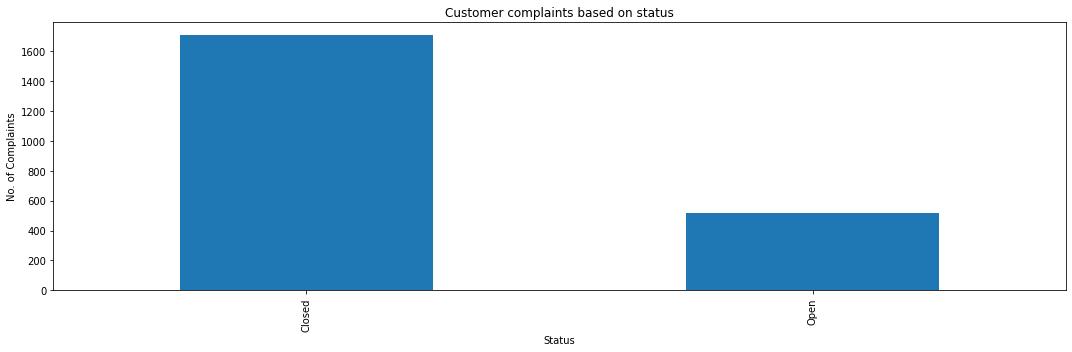

In [35]:
n.plot(kind='bar')
plt.xlabel("Status") 
plt.ylabel("No. of Complaints") 
plt.title("Customer complaints based on status")  
plt.show()

In [36]:
df.columns

Index(['Customer Complaint', 'Date', 'Date_month_year', 'Time', 'Received Via',
       'City', 'State', 'Zip code', 'Status', 'Filing on Behalf of Someone',
       'month', 'Date of the Month', 'Complaint Category', 'Stat', 'Stat_le'],
      dtype='object')

In [37]:
df.columns

Index(['Customer Complaint', 'Date', 'Date_month_year', 'Time', 'Received Via',
       'City', 'State', 'Zip code', 'Status', 'Filing on Behalf of Someone',
       'month', 'Date of the Month', 'Complaint Category', 'Stat', 'Stat_le'],
      dtype='object')

In [38]:
y=df['Stat'].groupby(df['State']).count().sort_values(ascending=False)

In [39]:
Dst=pd.DataFrame(y)
Dst       #Georgia has maximum complaints

,Stat
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143
Pennsylvania,130
Michigan,115
Washington,98
Colorado,80


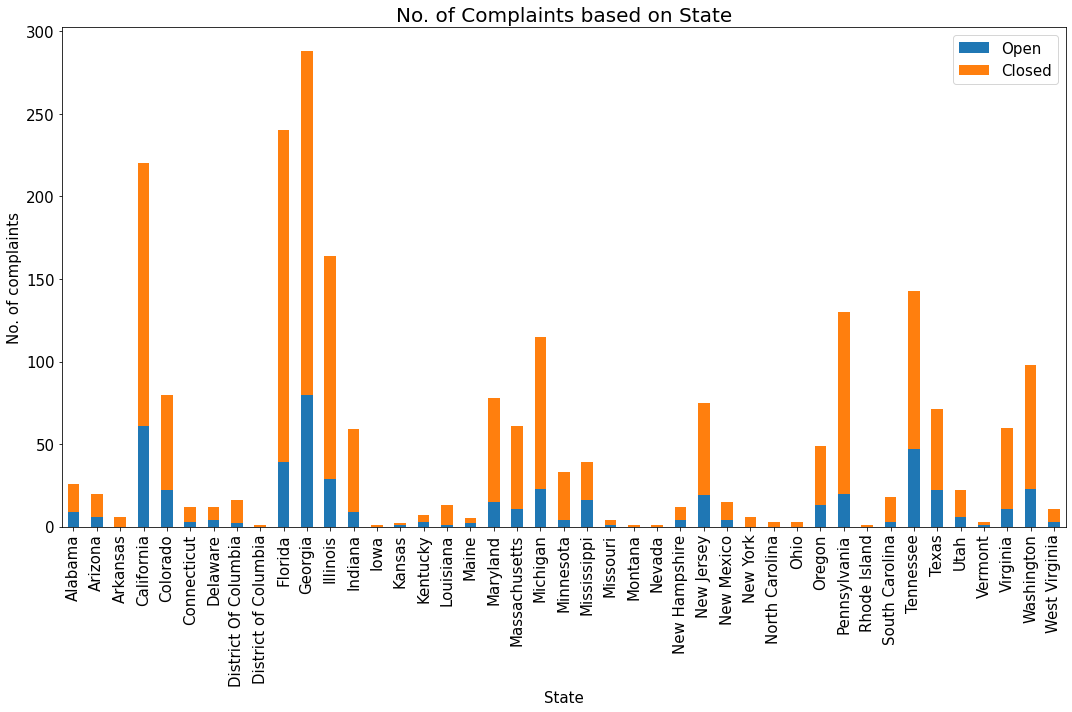

In [40]:
ch = df.groupby(['State', 'Stat'])['State'].count().unstack('Stat')
z = ch[['Open','Closed']].plot(kind='bar', stacked=True,rot=90,figsize=(15,10),fontsize=15)
z.set_xlabel("State",fontsize=15)
z.set_ylabel("No. of complaints",fontsize=15)
z.set_title("No. of Complaints based on State",fontsize=20)
z.legend(labels=['Open','Closed'],fontsize=15)

In [41]:
#From the graph we can infer that Georgia has the maximum complaints

In [42]:
#unresolved complaints

In [43]:
df.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Date of the Month,Complaint Category,Stat,Stat_le
Ticket #,,,,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Internet,Closed,0
223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Paym,Closed,0
242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Internet,Closed,0
277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Usage,Open,1
307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Usage,Closed,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 250635 to 363614
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Customer Complaint           2224 non-null   object        
 1   Date                         2224 non-null   datetime64[ns]
 2   Date_month_year              2224 non-null   datetime64[ns]
 3   Time                         2224 non-null   object        
 4   Received Via                 2224 non-null   object        
 5   City                         2224 non-null   object        
 6   State                        2224 non-null   object        
 7   Zip code                     2224 non-null   int64         
 8   Status                       2224 non-null   object        
 9   Filing on Behalf of Someone  2224 non-null   object        
 10  month                        2224 non-null   int64         
 11  Date of the Month            2224 non-nul

In [45]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 250635 to 363614
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Customer Complaint           2224 non-null   object        
 1   Date                         2224 non-null   datetime64[ns]
 2   Date_month_year              2224 non-null   datetime64[ns]
 3   Time                         2224 non-null   object        
 4   Received Via                 2224 non-null   object        
 5   City                         2224 non-null   object        
 6   State                        2224 non-null   object        
 7   Zip code                     2224 non-null   int64         
 8   Status                       2224 non-null   object        
 9   Filing on Behalf of Someone  2224 non-null   object        
 10  month                        2224 non-null   int64         
 11  Date of the Month            2224 non-nul

In [46]:
u = df[df['Stat']=='Open'].groupby(['State'])['Stat'].count().fillna(0)
u=pd.DataFrame(u)
u['UNRESOLVED COMPLAINTS']=u['Stat']
u=u.drop(['Stat'],axis=1)
u

,UNRESOLVED COMPLAINTS
State,
Alabama,9
Arizona,6
California,61
Colorado,22
Connecticut,3
Delaware,4
District Of Columbia,2
Florida,39
Georgia,80


In [48]:
df.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Date of the Month,Complaint Category,Stat,Stat_le
Ticket #,,,,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Internet,Closed,0
223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Paym,Closed,0
242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Internet,Closed,0
277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Usage,Open,1
307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Usage,Closed,0


In [49]:
d = df[df['Stat']=='Closed'].groupby(['State'])['Stat'].count().fillna(0)
d=pd.DataFrame(d)
d['RESOLVED COMPLAINTS']=d['Stat']
d=d.drop(['Stat'],axis=1)
d


,RESOLVED COMPLAINTS
State,
Alabama,17
Arizona,14
Arkansas,6
California,159
Colorado,58
Connecticut,9
Delaware,8
District Of Columbia,14
District of Columbia,1


In [50]:
t = df.groupby(['State'])['Stat'].count()
t=pd.DataFrame(t)

In [52]:
u

,UNRESOLVED COMPLAINTS
State,
Alabama,9
Arizona,6
California,61
Colorado,22
Connecticut,3
Delaware,4
District Of Columbia,2
Florida,39
Georgia,80


In [53]:
df.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Date of the Month,Complaint Category,Stat,Stat_le
Ticket #,,,,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Internet,Closed,0
223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Paym,Closed,0
242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Internet,Closed,0
277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Usage,Open,1
307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Usage,Closed,0


In [54]:
St=df['State'].unique()

In [55]:
St=pd.DataFrame(St)
St.columns = ['State']
St

,State
0,Maryland
1,Georgia
2,Michigan
3,California
4,New Mexico
5,Indiana
6,Virginia
7,Illinois
8,Pennsylvania
9,Massachusetts


In [56]:
m=pd.merge(St,u,on=["State"],how="outer").fillna(0)
m

,State,UNRESOLVED COMPLAINTS
0,Maryland,15.0
1,Georgia,80.0
2,Michigan,23.0
3,California,61.0
4,New Mexico,4.0
5,Indiana,9.0
6,Virginia,11.0
7,Illinois,29.0
8,Pennsylvania,20.0
9,Massachusetts,11.0


In [57]:
d

,RESOLVED COMPLAINTS
State,
Alabama,17
Arizona,14
Arkansas,6
California,159
Colorado,58
Connecticut,9
Delaware,8
District Of Columbia,14
District of Columbia,1


In [58]:
m2=pd.merge(d,m,on=["State"],how="outer")

In [59]:
m2

,State,RESOLVED COMPLAINTS,UNRESOLVED COMPLAINTS
0,Alabama,17,9.0
1,Arizona,14,6.0
2,Arkansas,6,0.0
3,California,159,61.0
4,Colorado,58,22.0
5,Connecticut,9,3.0
6,Delaware,8,4.0
7,District Of Columbia,14,2.0
8,District of Columbia,1,0.0
9,Florida,201,39.0


In [60]:
m3=pd.merge(St,Dst,on=["State"],how="outer")
m3

,State,Stat
0,Maryland,78
1,Georgia,288
2,Michigan,115
3,California,220
4,New Mexico,15
5,Indiana,59
6,Virginia,60
7,Illinois,164
8,Pennsylvania,130
9,Massachusetts,61


In [102]:
p= m['UNRESOLVED COMPLAINTS'].div(m3['Stat']).mul(100)
p=pd.DataFrame(p)
p['State']=St['State']  
p.columns=['% of unresolved complaints','State']

p

,% of unresolved complaints,State
0,19.230769,Maryland
1,27.777778,Georgia
2,20.000000,Michigan
3,27.727273,California
4,26.666667,New Mexico
5,15.254237,Indiana
6,18.333333,Virginia
7,17.682927,Illinois
8,15.384615,Pennsylvania
9,18.032787,Massachusetts


In [122]:
p=p.loc[:,['State','% of unresolved complaints']]
p.sort_values(by=['% of unresolved complaints'],ascending=False)
#Kansas has the highest % of unresolved complaints

,State,% of unresolved complaints
36,Kansas,50.000000
28,Kentucky,42.857143
25,Mississippi,41.025641
21,Maine,40.000000
17,Alabama,34.615385
27,Vermont,33.333333
32,Delaware,33.333333
12,New Hampshire,33.333333
14,Tennessee,32.867133
11,Texas,30.985915


In [63]:
#percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [114]:
z=df[df['Stat']=='Closed']
z1=z['Stat'].count()
type(z1)

numpy.int64

In [89]:
t=df[(df['Stat']=='Closed') & (df['Received Via']=='Internet')]
t

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Date of the Month,Complaint Category,Stat,Stat_le
Ticket #,,,,,,,,,,,,,,,
223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Paym,Closed,0
242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Internet,Closed,0
307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Usage,Closed,0
338519,ISP Charging for arbitrary data limits with ov...,2015-06-12,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,12,6,Internet,Closed,0
359792,Comcast refuses to help troubleshoot and corre...,2015-06-23,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,6,23,Usage,Closed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326963,Internet Services,2015-06-06,2015-06-06,4:01:16 PM,Internet,Wyoming,Michigan,49509,Closed,No,6,6,Internet,Closed,0
256002,i had sent out a check payment comcast,2015-04-24,2015-04-24,5:05:36 PM,Internet,York,Pennsylvania,17401,Closed,No,4,24,Paym,Closed,0
310847,Comcast Internet Service quality,2015-05-28,2015-05-28,8:56:14 AM,Internet,York,Pennsylvania,17403,Solved,No,5,28,Internet,Closed,0


In [109]:
t1=t['Stat'].count()


In [111]:
s=(t1/z1)*100  ##percentage of complaints resolved till date, which were received through the Internet
s

49.38488576449912

In [115]:
df['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [118]:
cu=df[(df['Stat']=='Closed') & (df['Received Via']=='Customer Care Call')]
cu=cu['Stat'].count()

In [119]:
s1=(cu/z1)*100  ##percentage of complaints resolved till date, which were received through the Customer Care Call
s1

50.61511423550088

In [ ]:
                 #END 